In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# En este notebook se tratará de clasficiar correctamente 3 tipos de marcas de zapatillas, Nike, Adidas y Converse, para ello se utiliza una red neuronal de convolución

In [ ]:
# Se importan las librerias necesarias
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, SeparableConv2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, save_model, load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carga de archivos
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Projects/Kaggle/Computer Vision/Nike Adidas Converse classification/dataset/train",
                                                     target_size=(240,240),
                                                     batch_size=32)

testing_dataset = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Projects/Kaggle/Computer Vision/Nike Adidas Converse classification/dataset/test",
                                                     target_size=(240,240),
                                                     batch_size=32)

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


(32, 240, 240, 3)


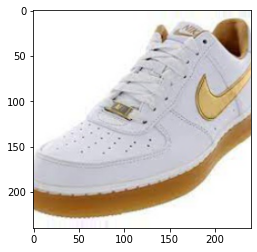

(32, 240, 240, 3)


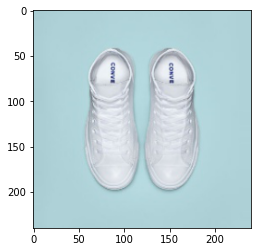

(32, 240, 240, 3)


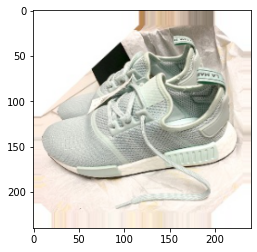

In [ ]:
for _ in range(3):
    img, label = training_dataset.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

In [ ]:
# Tras varias pruebas de diferentes arquitecturas se llega a una red con 3 capas de convolución con 32 filtros con sus capas de max pooling para luego entrar a una red neuronal de 64 neuronas
classifier = Sequential()

classifier.add(SeparableConv2D(32, (3,3), input_shape=(240,240,3), activation="relu"))
classifier.add(MaxPooling2D(2,2))
classifier.add(SeparableConv2D(32, (3,3), activation="relu"))
classifier.add(MaxPooling2D(2,2))
classifier.add(SeparableConv2D(32, (3,3), activation="relu"))
classifier.add(MaxPooling2D(2,2))

classifier.add(Flatten())

classifier.add(Dense(64, activation="relu", kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(3, activation="softmax"))

classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_3 (Separab  (None, 238, 238, 32)     155       
 leConv2D)                                                       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 separable_conv2d_4 (Separab  (None, 117, 117, 32)     1344      
 leConv2D)                                                       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 separable_conv2d_5 (Separab  (None, 56, 56, 32)      

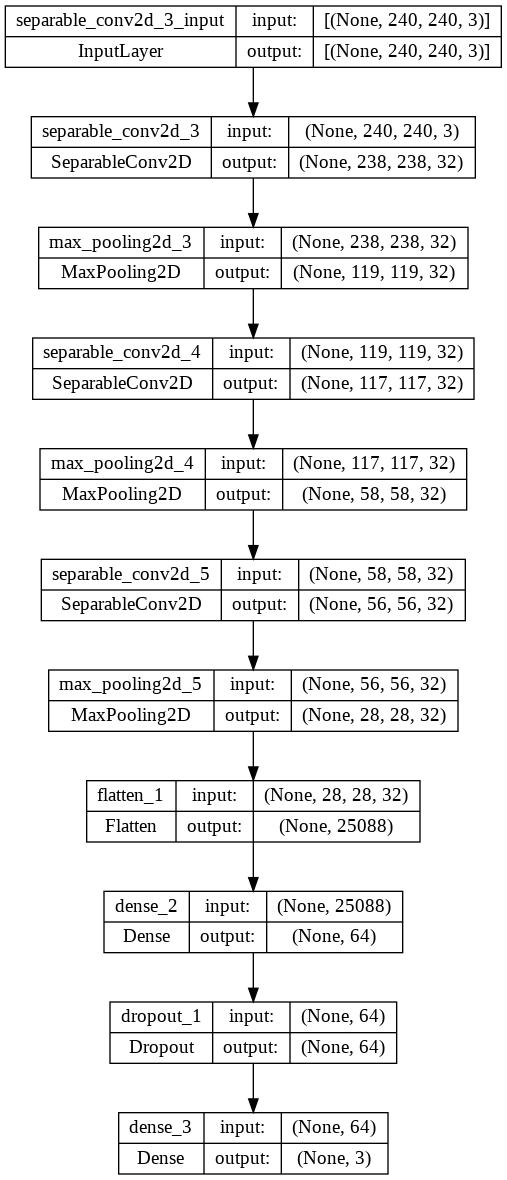

In [ ]:
plot_model(classifier, show_shapes=True)

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=7)

history = classifier.fit(training_dataset,
                         epochs=50,
                         validation_data=testing_dataset,
                         callbacks=[callback])

Epoch 1/50
23/23 [==============================] - 375s 16s/step - loss: 1.1005 - accuracy: 0.3263 - val_loss: 1.0981 - val_accuracy: 0.3596
Epoch 2/50
23/23 [==============================] - 12s 528ms/step - loss: 1.0980 - accuracy: 0.3671 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 3/50
23/23 [==============================] - 12s 526ms/step - loss: 1.1010 - accuracy: 0.3319 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 4/50
23/23 [==============================] - 12s 515ms/step - loss: 1.0973 - accuracy: 0.3404 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 5/50
23/23 [==============================] - 12s 520ms/step - loss: 1.0972 - accuracy: 0.3390 - val_loss: 1.0964 - val_accuracy: 0.4649
Epoch 6/50
23/23 [==============================] - 12s 525ms/step - loss: 1.0966 - accuracy: 0.3727 - val_loss: 1.0832 - val_accuracy: 0.4561
Epoch 7/50
23/23 [==============================] - 12s 518ms/step - loss: 1.0867 - accuracy: 0.4079 - val_loss: 1.0728 - val_accuracy: 0.4298


In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

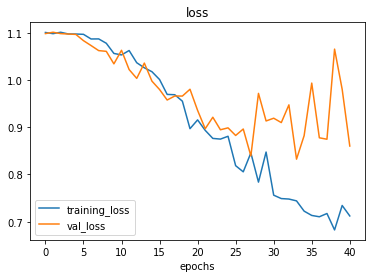

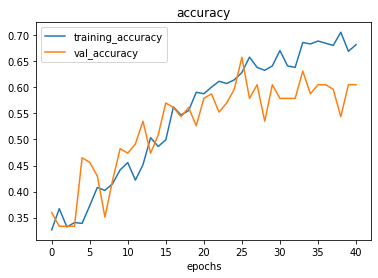

In [ ]:
# La precisión máxima que se obtiene es baja, debido en parte al dataset tan pequeño y la imposibilidad de crear una red neuronal más compleja, por lo que se recurre al transfer learning
plot_loss_curves(history)

In [ ]:
# Se utiliza el modelo de EfficientNetB4, que no se trata de un modelo muy pesado y es suficientemente potente para esta tarea
base_model = applications.EfficientNetB4(include_top=False, input_shape=(240,240,3))

71686520/71686520 [==============================] - 4s 0us/step


In [ ]:
base_model.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 240, 240, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 240, 240, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 240, 240, 3)  0           ['normalization[0][0

In [ ]:
print("Number of layersin the base model: {}".format(len(base_model.layers)))

Number of layersin the base model: 475


In [ ]:
base_model.trainable = True
fine_tune_at = 200
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
base_model.output

<KerasTensor: shape=(None, 8, 8, 1792) dtype=float32 (created by layer 'top_activation')>

In [ ]:
global_average_layer = GlobalAveragePooling2D()(base_model.output)
prediction_layer = Dense(units=3, activation='softmax')(global_average_layer)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction_layer)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
model.fit(training_dataset, epochs=20, validation_data=testing_dataset)

Epoch 1/20
23/23 [==============================] - 32s 760ms/step - loss: 0.3212 - accuracy: 0.8805 - val_loss: 1.5035 - val_accuracy: 0.8158
Epoch 2/20
23/23 [==============================] - 15s 627ms/step - loss: 0.1393 - accuracy: 0.9578 - val_loss: 0.9431 - val_accuracy: 0.7895
Epoch 3/20
23/23 [==============================] - 17s 738ms/step - loss: 0.1266 - accuracy: 0.9522 - val_loss: 0.7928 - val_accuracy: 0.8333
Epoch 4/20
23/23 [==============================] - 14s 621ms/step - loss: 0.1034 - accuracy: 0.9606 - val_loss: 0.5572 - val_accuracy: 0.8509
Epoch 5/20
23/23 [==============================] - 14s 619ms/step - loss: 0.0952 - accuracy: 0.9620 - val_loss: 1.4440 - val_accuracy: 0.7982
Epoch 6/20
23/23 [==============================] - 15s 627ms/step - loss: 0.1795 - accuracy: 0.9409 - val_loss: 0.7759 - val_accuracy: 0.7982
Epoch 7/20
23/23 [==============================] - 15s 625ms/step - loss: 0.1306 - accuracy: 0.9564 - val_loss: 0.4847 - val_accuracy: 0.8509

In [ ]:
# Se puede ver que en la primera red se obtenía una puntiación del 70% en el conjunto de entrenamiento y del 60% en el test, con transfer learning se obtiene 97% y 86%